Data Preprocessing

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the Dataset

In [3]:
data = pd.read_csv('/content/Admission_Predict2.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
print(f'No of Rows in the dataset : {data.shape[0]}')
print(f'No of Columns in the dataset : {data.shape[1]}')

No of Rows in the dataset : 400
No of Columns in the dataset : 9


Descriptive Statistics

In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

Handling Missing Values

In [9]:
data.drop('Serial No.', inplace=True, axis=1)

In [10]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
data = data.rename(columns={'LOR':'LOR','Chance of Admit ':'Chance of Admit'})

In [12]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [14]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Check for Categorical columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [15]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Data Visualization

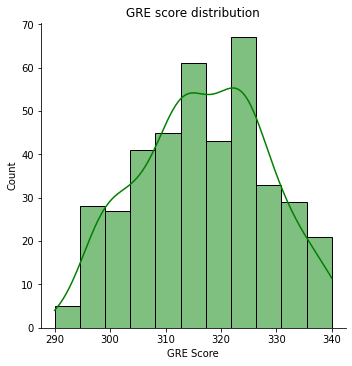

In [16]:
sns.displot(x=data["GRE Score"], kde=True, color='green')
plt.title("GRE score distribution");

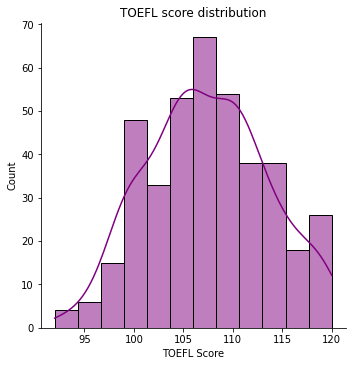

In [17]:
sns.displot(x=data["TOEFL Score"], kde=True, color='purple')
plt.title("TOEFL score distribution");


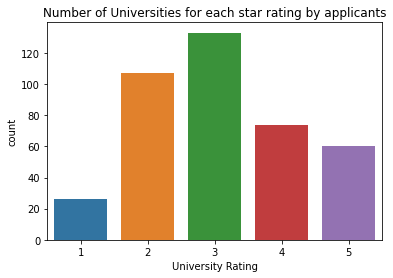

In [18]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

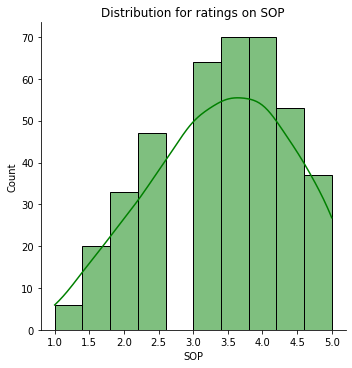

In [19]:
sns.displot(x=data["SOP"], kde=True, color='green');
plt.title("Distribution for ratings on SOP");

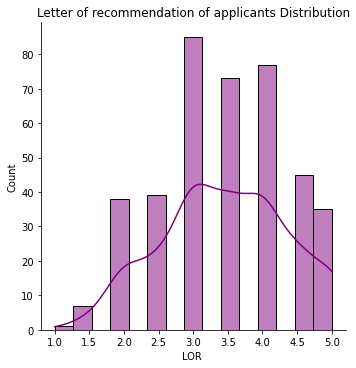

In [20]:
sns.displot(x=data["LOR "], kde=True, color='purple');
plt.title("Letter of recommendation of applicants Distribution");

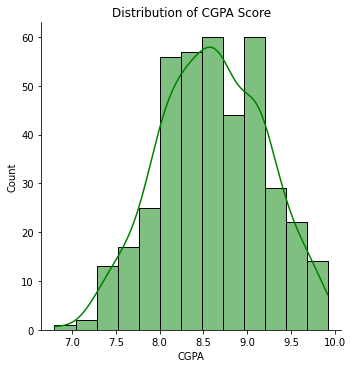

In [21]:
sns.displot(x=data["CGPA"], kde=True, color='green');
plt.title("Distribution of CGPA Score");

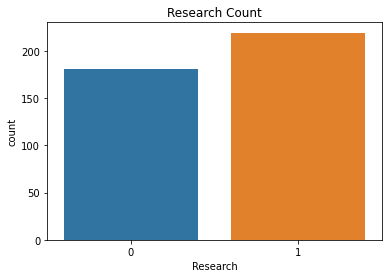

In [22]:
sns.countplot(x=data["Research"]);
plt.title("Research Count");

Bivariate Analysis

In [24]:
cols = data.columns

In [23]:
features = [i for i in data.columns if i != 'Chance of Admit']
label = 'Chance of Admit'

In [25]:
features

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

[]

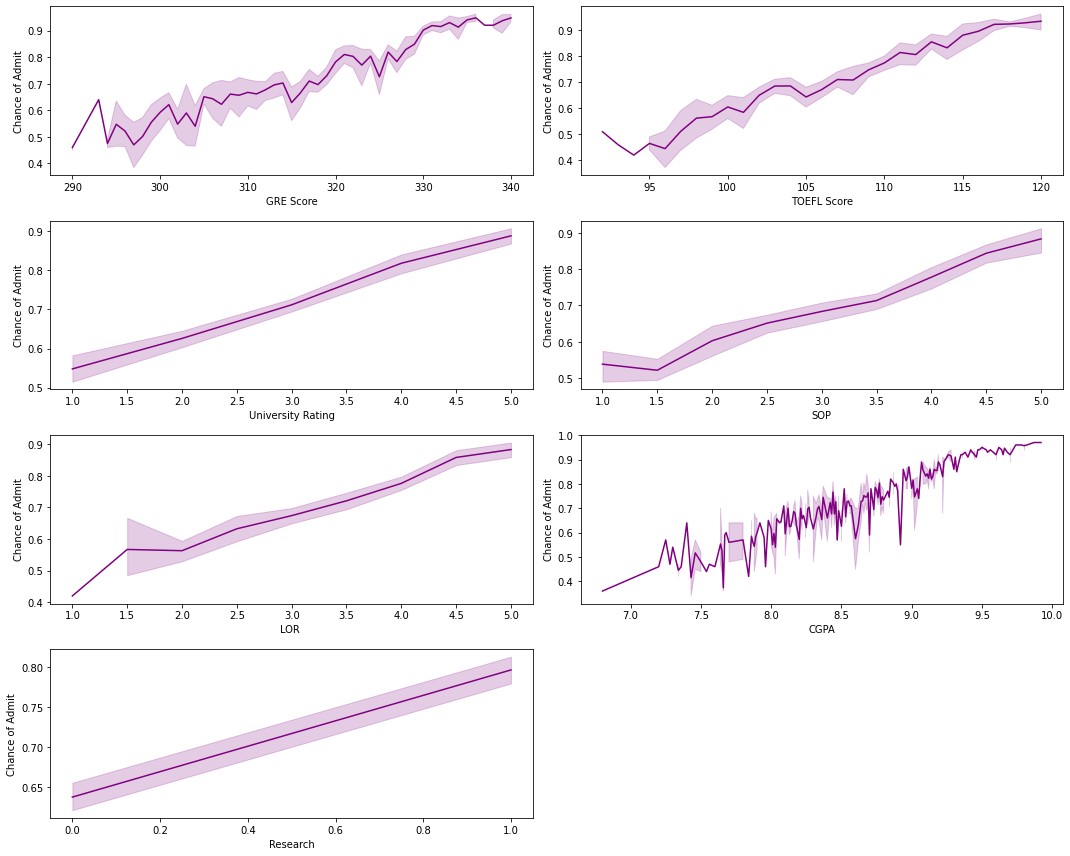

In [26]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.lineplot(x=features[i], y=label, data=data, color='purple')
plt.tight_layout()   
plt.plot()

[]

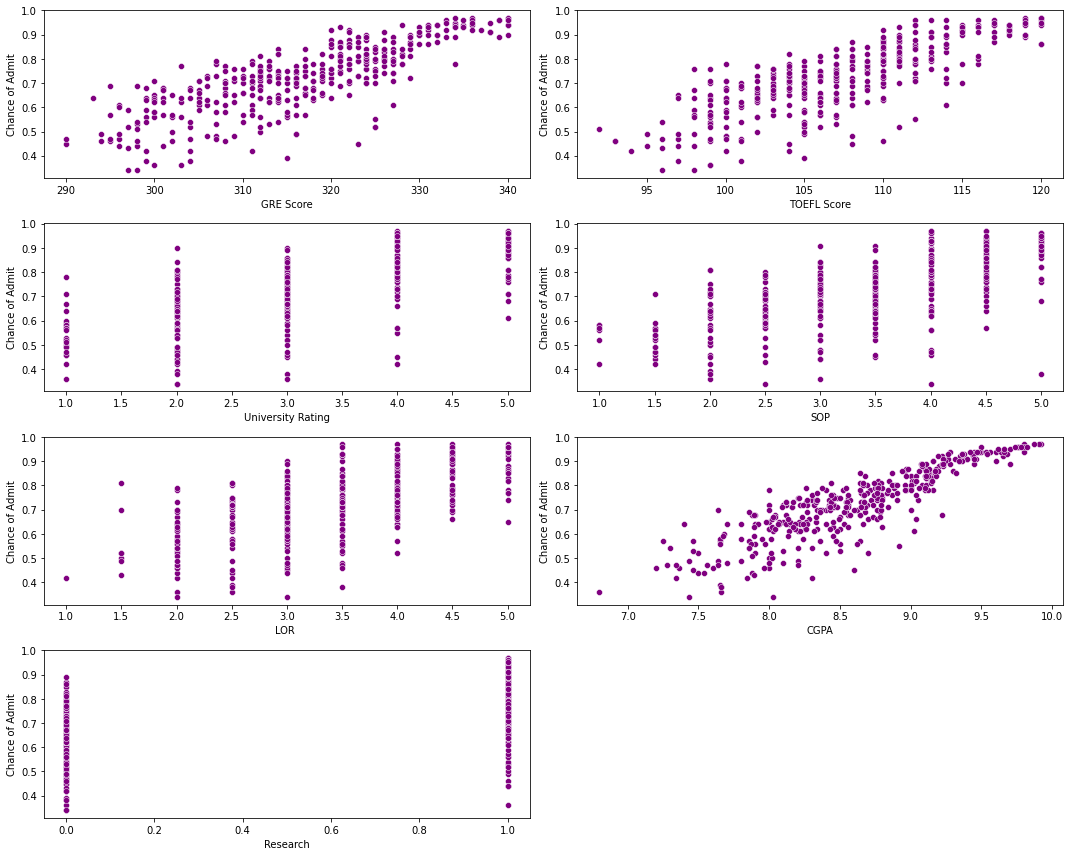

In [27]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=features[i], y=label, data=data, color='purple')
plt.tight_layout()   
plt.plot()

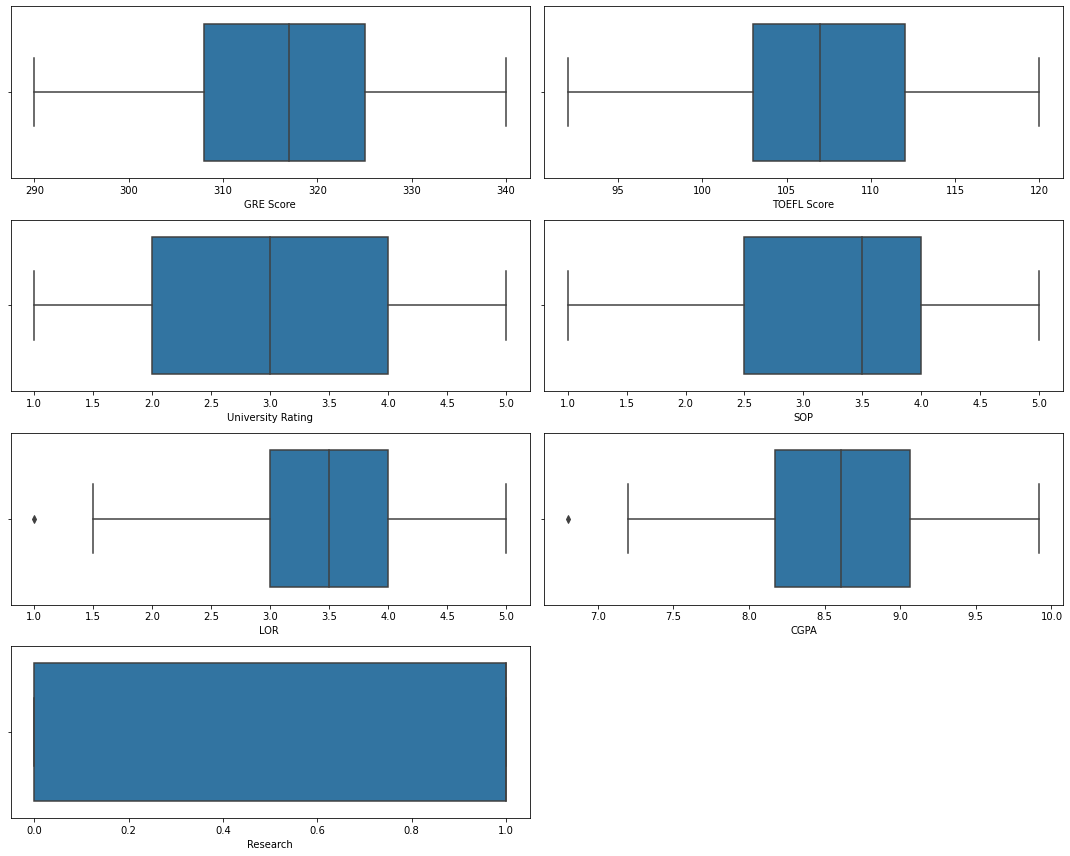

In [28]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=data[features[i]])
plt.tight_layout()

Multi-Variate Analysis

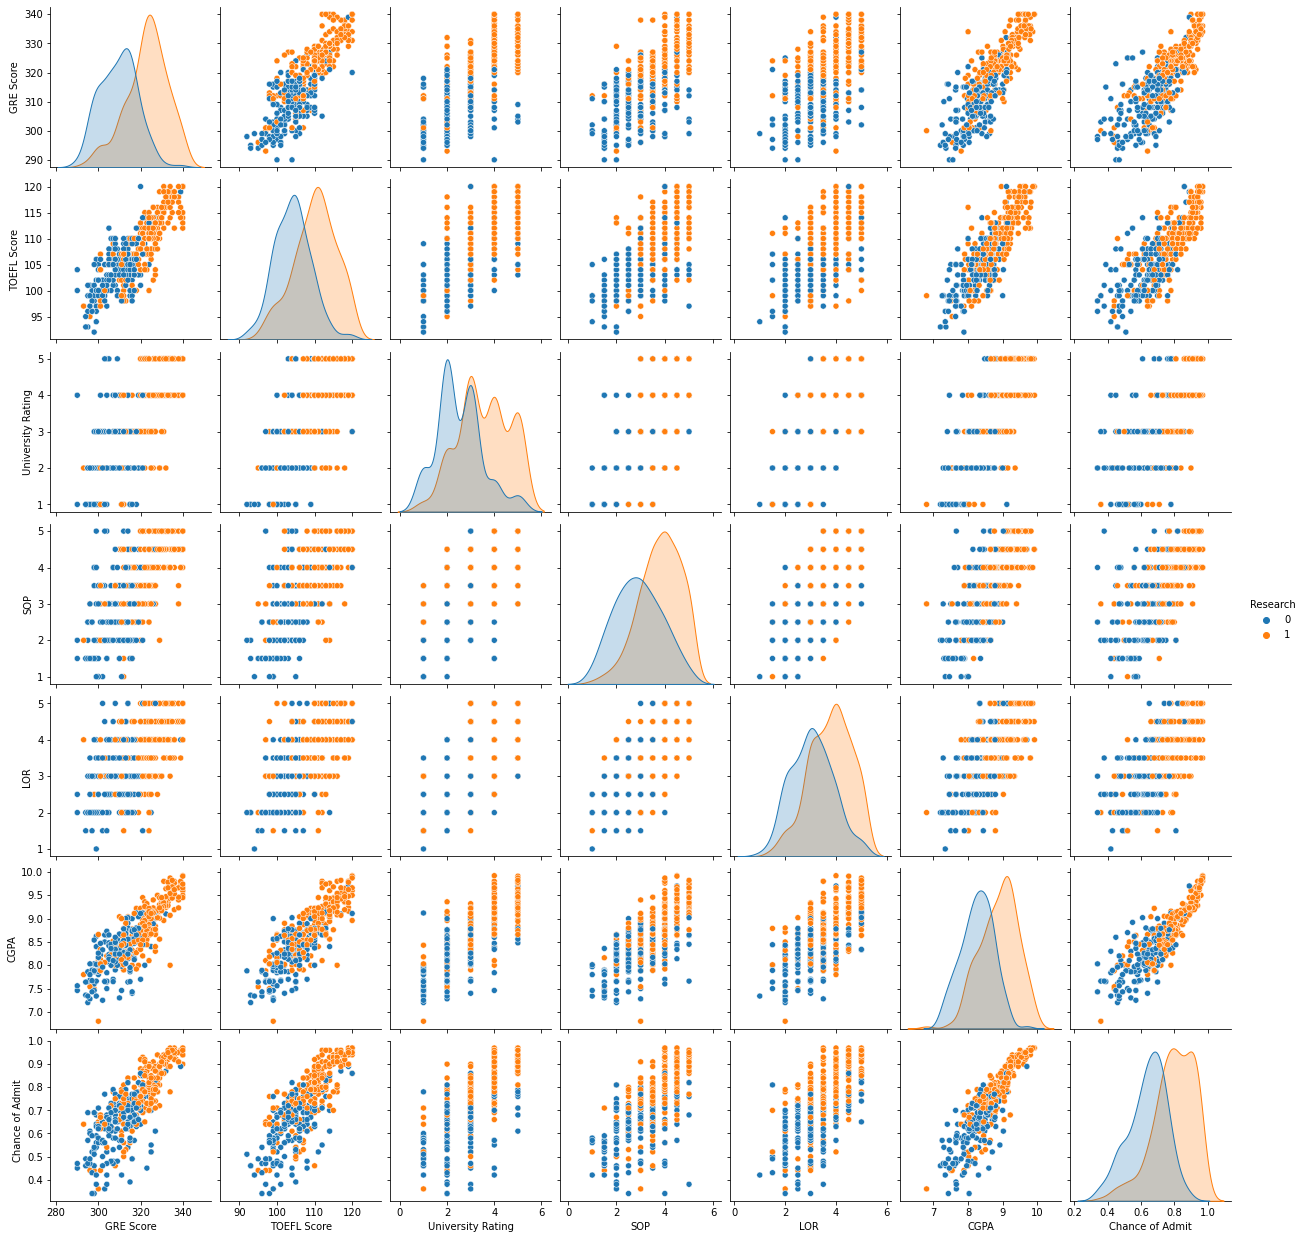

In [29]:
sns.pairplot(data,hue='Research')


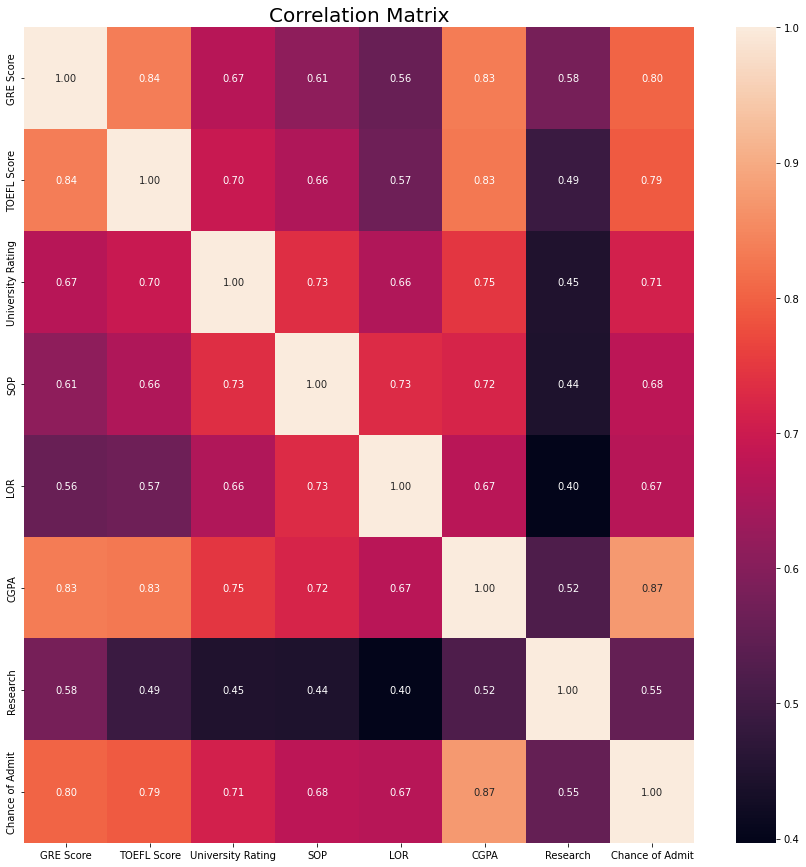

In [30]:
corr_matrix = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

In [31]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
x = data.iloc[:,0:7]
y = data['Chance of Admit']

In [33]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [34]:
y.head().to_frame()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [35]:
print(f'x contains: {x.shape[0]} rows and {x.shape[1]} columns')

x contains: 400 rows and 7 columns


In [36]:
print(f'y contains: {y.shape}')

y contains: (400,)


Scale the independent variables

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [38]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [39]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


Split the data into training and testing

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
print(f'x_train contains: {x_train.shape[0]} rows and {x_train.shape[1]} columns')
print(f'x_test contains: {x_test.shape[0]} rows and {x_test.shape[1]} columns')

x_train contains: 320 rows and 7 columns
x_test contains: 80 rows and 7 columns


In [43]:
print(f'y_train contains: {y_train.shape}')
print(f'y_test contains: {y_test.shape}')

y_train contains: (320,)
y_test contains: (80,)


In [44]:
y_train_target = [1 if each > 0.8 else 0 for each in y_train]
y_test_target = [1 if each > 0.8 else 0 for each in y_test]

Model Building

Training And Testing The Model

In [45]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(x_train,y_train_target)

LogisticRegression()

In [46]:
y_predict_LR = model_LR.predict(x_test)

In [47]:
y_predict_LR

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [48]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svm = LinearSVC()
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(x_train,y_train_target)

CalibratedClassifierCV(base_estimator=LinearSVC())

In [49]:
y_predict_svm = model_svm.predict(x_test)

In [50]:
y_predict_svm

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [51]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train_target)

RandomForestClassifier()

In [52]:
y_predict_rf = model_rf.predict(x_test)

In [53]:
y_predict_rf

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [54]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train_target)

KNeighborsClassifier()

In [55]:
y_predict_knn = model_knn.predict(x_test)

In [56]:
y_predict_knn

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [57]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(x_train,y_train_target)

GaussianNB()

In [58]:
y_predict_gnb = model_gnb.predict(x_test)

In [59]:
y_predict_gnb

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

Model Evaluation

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

Logistic Regression

In [61]:
print(classification_report(y_test_target,y_predict_LR))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.96      0.79      0.87        29

    accuracy                           0.91        80
   macro avg       0.93      0.89      0.90        80
weighted avg       0.92      0.91      0.91        80



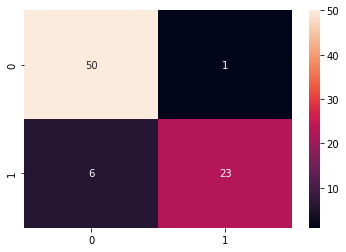

In [62]:
con_matrix = confusion_matrix(y_test_target,y_predict_LR)
sns.heatmap(con_matrix,annot=True)

In [63]:
print(classification_report(y_test_target,y_predict_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.93      0.86      0.89        29

    accuracy                           0.93        80
   macro avg       0.93      0.91      0.92        80
weighted avg       0.93      0.93      0.92        80



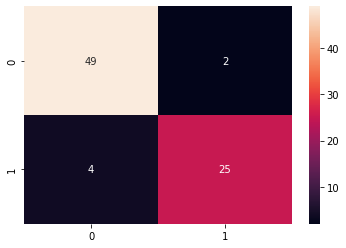

In [64]:
con_matrix = confusion_matrix(y_test_target,y_predict_rf)
sns.heatmap(con_matrix,annot=True)

In [65]:
print(classification_report(y_test_target,y_predict_knn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.96      0.79      0.87        29

    accuracy                           0.91        80
   macro avg       0.93      0.89      0.90        80
weighted avg       0.92      0.91      0.91        80



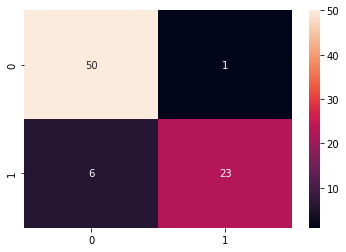

In [66]:
con_matrix = confusion_matrix(y_test_target,y_predict_knn)
sns.heatmap(con_matrix,annot=True)

In [67]:
print(classification_report(y_test_target, y_predict_gnb))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.93      0.97      0.95        29

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



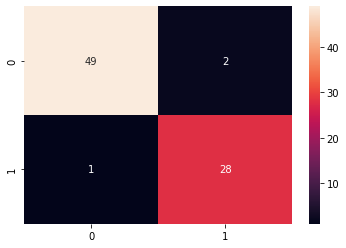

In [68]:
con_matrix = confusion_matrix(y_test_target, y_predict_gnb)
sns.heatmap(con_matrix, annot = True)

Save The Model

In [69]:
print(classification_report(y_test_target, y_predict_gnb))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.93      0.97      0.95        29

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [70]:
import pickle

In [71]:
pickle.dump(model_gnb,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))

In [72]:
import joblib

In [73]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [74]:
import pandas as pd
pd. __version__

'1.3.5'

In [75]:
import numpy as np
np.__version__

'1.21.6'

In [76]:
import joblib as jb
jb.__version__

'1.2.0'

In [77]:
import sklearn
sklearn.__version__

'1.0.2'

In [78]:
import pickle 
print(pickle.format_version)

4.0
